# Deep Learning (DL) Application to Ailments Classification Using Medical Text and Audio in Natural Language Processing (NLP)

Read Data in Google Colab from My Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Libraries & Packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import IPython
import IPython.display as ipd
import audioread
import matplotlib.pyplot as plt
import librosa
from nltk.corpus import stopwords
import random
from scipy.io import wavfile
from tqdm import tqdm_notebook as tqdm
import tensorflow as tf
import os
from collections import Counter
from sklearn.preprocessing import OneHotEncoder
from tensorflow.python.keras.optimizer_v2.adam import Adam
from nltk.util import ngrams
from keras.callbacks import LearningRateScheduler
import nltk
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import Model
import glob
from PIL import Image

Download Natural Language Toolkit (NLTK) data platform for building Python programs to work with human language data

In [3]:
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

Change Directory

In [4]:
cd /content/drive/MyDrive/Colab Notebooks/Data/Medical Speech, Transcription, and Intent/recordings

/content/drive/MyDrive/Colab Notebooks/Data/Medical Speech, Transcription, and Intent/recordings


List the contents of the current directory

In [5]:
ls

FI-DF.pdf  overview-of-recordings.csv  test/  text_classifier.h5  train/  validate/


#Import Data

In [6]:
import_df = pd.read_csv('overview-of-recordings.csv')
import_df = import_df[['file_name','phrase','prompt','overall_quality_of_the_audio','speaker_id']]
print(import_df.shape)
import_df.head()

(6661, 5)


,file_name,phrase,prompt,overall_quality_of_the_audio,speaker_id
0,1249120_43453425_58166571.wav,When I remember her I feel down,Emotional pain,3.33,43453425
1,1249120_43719934_43347848.wav,When I carry heavy things I feel like breaking...,Hair falling out,3.33,43719934
2,1249120_43719934_53187202.wav,there is too much pain when i move my arm,Heart hurts,3.33,43719934
3,1249120_31349958_55816195.wav,My son had his lip pierced and it is swollen a...,Infected wound,3.33,31349958
4,1249120_43719934_82524191.wav,My muscles in my lower back are aching,Infected wound,4.67,43719934


# Overall Audio Quality

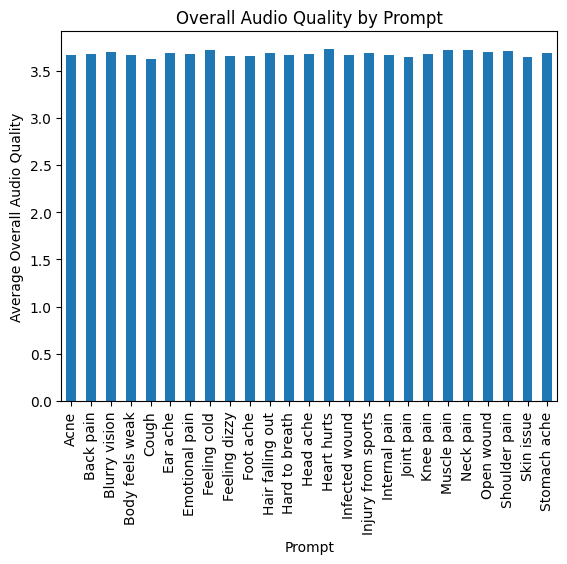

In [7]:
import matplotlib.pyplot as plt
import_df.groupby('prompt')['overall_quality_of_the_audio'].mean().plot(kind='bar')
plt.xlabel('Prompt')
plt.ylabel('Average Overall Audio Quality')
_ = plt.title('Overall Audio Quality by Prompt')

# Define the training and testing data

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(import_df['phrase'], import_df['overall_quality_of_the_audio'], test_size=0.2, random_state=42)


# Load the audio data into a variable called "audio"

In [9]:
# Load an example the audio data into a variable called "audio"
audio, sr = librosa.load('/content/drive/MyDrive/Colab Notebooks/Data/Medical Speech, Transcription, and Intent/recordings/test/1249120_13842059_104469105.wav')


# Autoencoders

Autoencoders will be used to denoise text datasets. For autoencoders, adjustments to the hidden layers of the network's size and depth increase layers, enabling the model to model the more subtle patterns in the audio features, which might yield better classification accuracy.

In [10]:
# Autoencoder for Audio Denoising
input_dim = audio.shape[0]
encoding_dim = 16

# Encoder
input_layer = keras.layers.Input(shape=(input_dim,))
encoder = keras.layers.Dense(encoding_dim, activation="relu")(input_layer)

# Decoder
decoder = keras.layers.Dense(input_dim, activation="relu")(encoder)

# Autoencoder
autoencoder = keras.models.Model(inputs=input_layer, outputs=decoder)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')

# Train the model
autoencoder.fit(audio.reshape(1, -1), audio.reshape(1, -1), epochs=100)

# Use the autoencoder to denoise the audio
denoised_audio = autoencoder.predict(audio.reshape(1, -1))

Epoch 1/100
1/1 [==============================] - 1s 800ms/step - loss: 0.0151
Epoch 2/100
1/1 [==============================] - 0s 43ms/step - loss: 0.0151
Epoch 3/100
1/1 [==============================] - 0s 47ms/step - loss: 0.0150
Epoch 4/100
1/1 [==============================] - 0s 37ms/step - loss: 0.0150
Epoch 5/100
1/1 [==============================] - 0s 38ms/step - loss: 0.0150
Epoch 6/100
1/1 [==============================] - 0s 45ms/step - loss: 0.0149
Epoch 7/100
1/1 [==============================] - 0s 40ms/step - loss: 0.0149
Epoch 8/100
1/1 [==============================] - 0s 56ms/step - loss: 0.0148
Epoch 9/100
1/1 [==============================] - 0s 45ms/step - loss: 0.0148
Epoch 10/100
1/1 [==============================] - 0s 38ms/step - loss: 0.0148
Epoch 11/100
1/1 [==============================] - 0s 40ms/step - loss: 0.0147
Epoch 12/100
1/1 [==============================] - 0s 45ms/step - loss: 0.0147
Epoch 13/100
1/1 [==============================

## Structured and Unstructured Observation

We will randomly sample the data frame and display the transcription, the classification, and the audio file in a player to get an idea of what the neural network will be figuring out.

In [11]:
test_num = random.randrange(0, len(import_df))
test_file_name = import_df.loc[test_num, 'file_name']
print(import_df.loc[test_num, 'prompt'] + '\n' + import_df.loc[test_num, 'phrase'])
display_audio_file = f'../test/{test_file_name}'
audio_rate = 44100

Shoulder pain
i can't move my shoulder because of pain


In [12]:
cd /content/drive/MyDrive/Colab Notebooks/Data/Medical Speech, Transcription, and Intent/recordings/test

/content/drive/MyDrive/Colab Notebooks/Data/Medical Speech, Transcription, and Intent/recordings/test


Load the audio data from the file.

In [13]:
from IPython.display import Audio
audio, audio_rate = librosa.load(display_audio_file)

Display the audio

In [14]:
IPython.display.Audio(audio, rate=audio_rate)

# Data Exploration
First, I'll visualize the target variable to get an idea what we're working with.

Number of unique prompts :  25


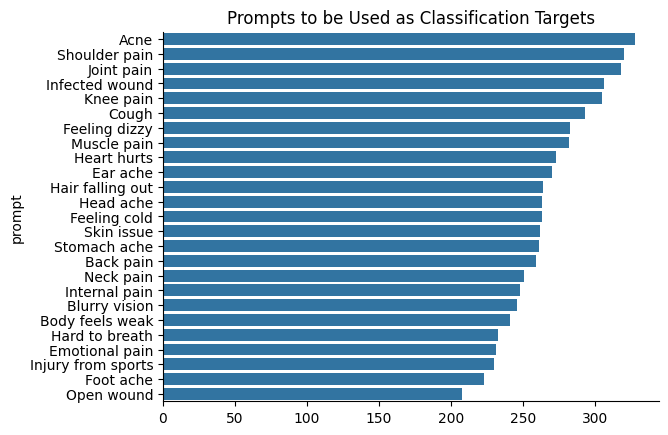

In [15]:
# Group data by prompt and count speaker IDs
grouped_series = import_df.groupby('prompt').agg('count')['speaker_id'].sort_values(ascending=False)
# Get the number of unique prompts
unique_prompts = len(import_df['prompt'].unique())
# Print the number of unique prompts
print("Number of unique prompts : ", unique_prompts)
# Create a bar plot
sns.barplot(x=grouped_series.values, y=grouped_series.index)
# Set the plot title
plt.title('Prompts to be Used as Classification Targets')
# Remove unnecessary plot borders
sns.despine()

We can also plot the distribution of the reported audio quality. The values are on the higher end of the 5-point scale, so we won't have to filter anything. We can drop the column now.

<ipython-input-16-81d2efa48cc7>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(import_df['overall_quality_of_the_audio'], hist=False, color='teal')


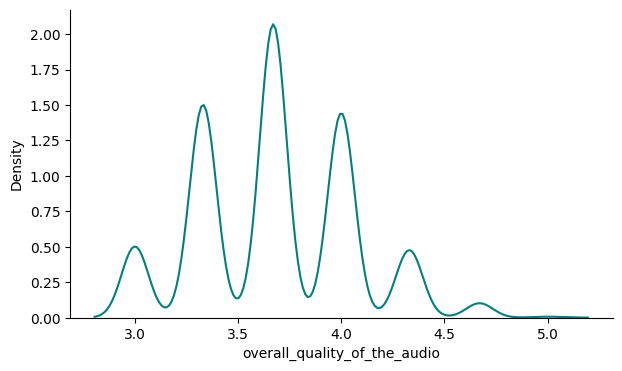

In [16]:
preprocess_df = import_df.drop('overall_quality_of_the_audio', axis=1)

fig = plt.figure(figsize=(7,4))
sns.distplot(import_df['overall_quality_of_the_audio'], hist=False, color='teal')
sns.despine()

# .WAV Features
## Spectrograms are a visual audio representation of the spectrum of frequencies of a signal as it varies with time

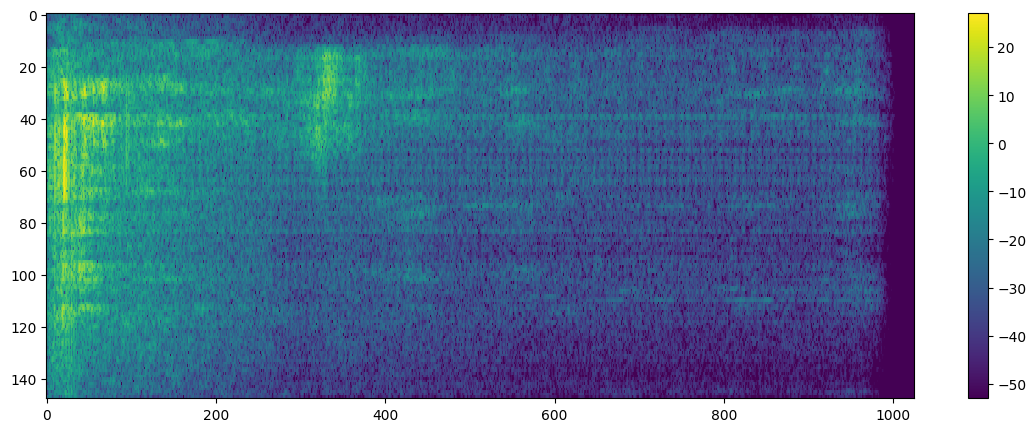

In [17]:
def get_spectrogram(waveform):
    # Extract the spectrogram from the waveform.
    spectrogram = librosa.stft(waveform)
    # Convert the spectrogram to decibels.
    spectrogram_db = librosa.amplitude_to_db(abs(spectrogram))
    return spectrogram_db

# Get the spectrogram for the test file.
spectrogram = get_spectrogram(audio)
# Plot the spectrogram.
plt.figure(figsize=(14, 5))
plt.imshow(spectrogram.T, aspect='auto', interpolation='nearest')
plt.colorbar()
plt.show()


# Spectrogram of Each Recording

This function will create a spectrogram of each recording using the Librosa library.

In [ ]:
# Spectrogram diagram

# This function will create a spectrogram of each recording using the Librosa library.
def generate_spectrogram(audio_path):
    # Load the audio file.
    audio, sample_rate = librosa.load(audio_path)

    # Compute the spectrogram.
    spectrogram = librosa.stft(audio)

    # Convert the spectrogram to decibels.
    spectrogram_db = librosa.amplitude_to_db(abs(spectrogram))

    # Plot the spectrogram.
    plt.figure(figsize=(14, 5))
    plt.imshow(spectrogram_db.T, aspect='auto', interpolation='nearest')
    plt.colorbar()
    plt.title('Spectrogram of ' + audio_path)
    plt.show()

# Generate a spectrogram for each recording.
for audio_path in glob.glob('*.wav'):
    generate_spectrogram(audio_path)


Output hidden; open in https://colab.research.google.com to view.

*We stopped the extraction due to the size of the data.*

# Tensorflow Plot Base Model

In [18]:
base_model = tf.keras.applications.InceptionV3(
    input_shape=(150, 150, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False

87910968/87910968 [==============================] - 1s 0us/step


# Plot the Base Model

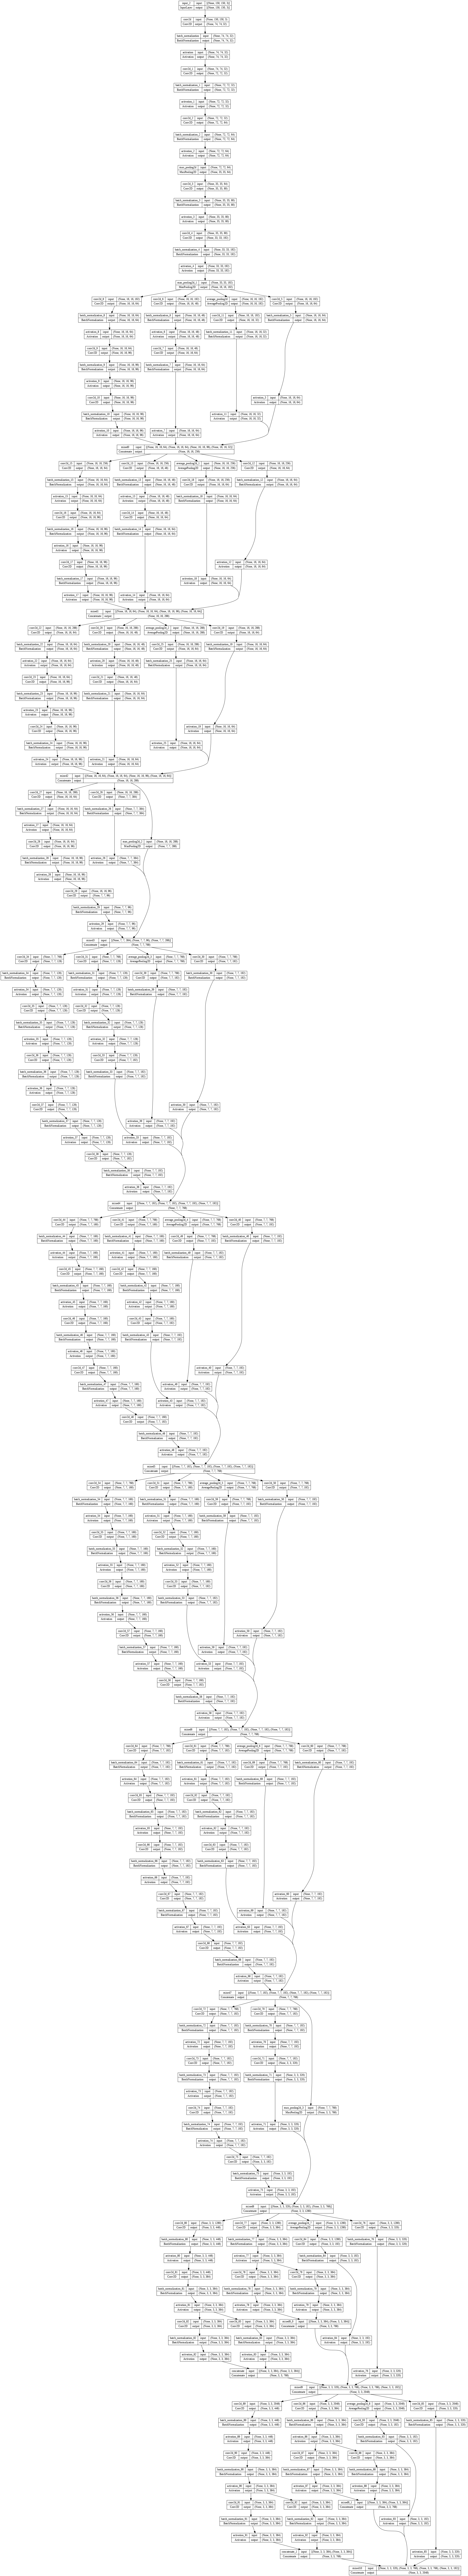

In [19]:
tf.keras.utils.plot_model(base_model, show_shapes=True, dpi=64)

# Plot Diagram TensorFlow

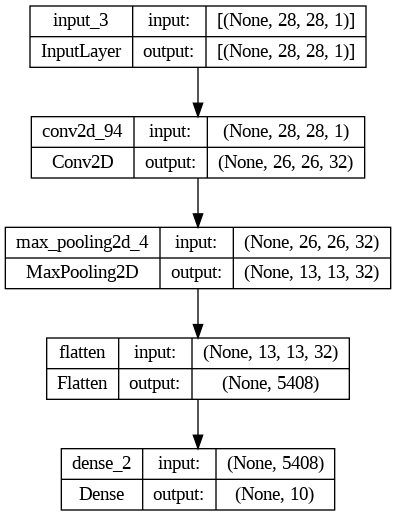

In [20]:
# Plot Diagram TensorFlow
from tensorflow.keras.utils import plot_model
# Create a Sequential model
model = keras.Sequential([
  keras.Input(shape=(28, 28, 1)),
  keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
  keras.layers.MaxPooling2D(pool_size=(2, 2)),
  keras.layers.Flatten(),
  keras.layers.Dense(10, activation="softmax")
])
# Plot the Model
plot_model(model, show_shapes=True)


We are removing contractions and then create a word dictionary with all the words from the phrases.

In [21]:
stop_words = set(stopwords.words('english'))
word_dict = {}
preprocess_df['phrase'] = [i.lower() for i in preprocess_df['phrase']]
preprocess_df['phrase'] = [i.replace('can\'t', 'can not') for i in preprocess_df['phrase']]
preprocess_df['phrase'] = [i.replace('i\'m', 'i am') for i in preprocess_df['phrase']]
preprocess_df['phrase'] = [i.replace('i\'ve', 'i have') for i in preprocess_df['phrase']]
preprocess_df['phrase'] = [' '.join([j for j in i.split(' ') if j not in stop_words]) for i in preprocess_df['phrase']]

for phrase in preprocess_df['phrase']:
    for word in phrase.split(' '):
        word = word.lower()
        if word in stop_words or word == '':
            pass
        elif word not in word_dict:
            word_dict[word] = 1
        else:
            word_dict[word] += 1

sorted_word_list = sorted(word_dict.items(), key=lambda kv: kv[1], reverse=True)

Below, we will show the "n" most common words in the phrases.

<Axes: >

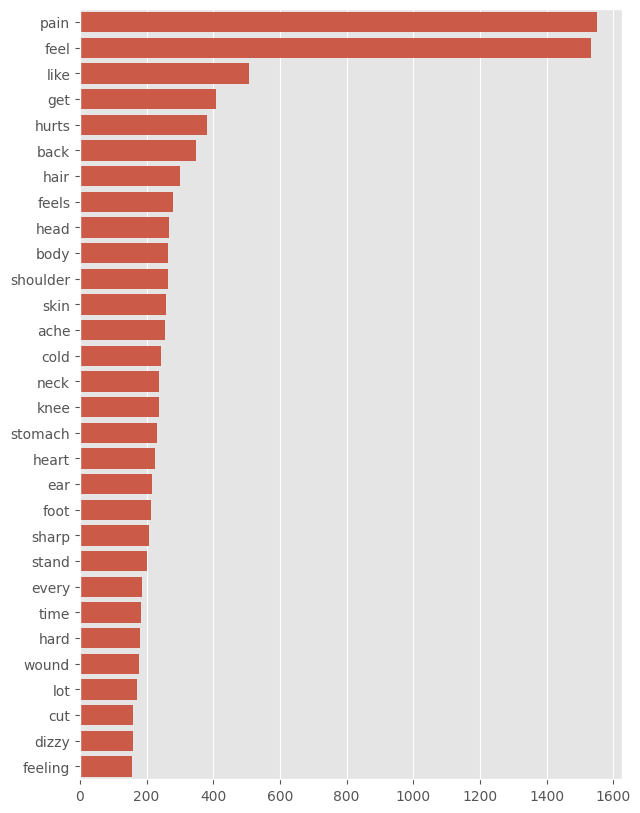

In [22]:
n = 30
fig = plt.figure(figsize=(7,10))
plt.style.use('ggplot')
sns.barplot(x=[i[1] for i in sorted_word_list[:n]], y=[i[0] for i in
sorted_word_list[:n]])

Inspired by [this](https://www.kaggle.com/code/nicapotato/explore-the-spooky-n-grams-wordcloud-bayes#N-Grams) kernel, we define some helper functions to create a data frame of the most common N-Grams.

In [23]:
def get_ngrams(text, n):
    n_grams = ngrams((text), n)
    return [' '.join(i) for i in n_grams]

def gramfreq(phrases, n, num):
    ngram_dict = {}
    for phrase in phrases:
        result = get_ngrams(phrase.split(' '),n)
        result_count = Counter(result)
        for gram in result_count.keys():
            if gram not in ngram_dict.keys():
                ngram_dict[gram] = 1
            else:
                ngram_dict[gram] += 1
    df = pd.DataFrame.from_dict(ngram_dict, orient='index')
    df = df.rename(columns={'index':'words', 0:'frequency'}) # Renaming index column name
    return df.sort_values(["frequency"],ascending=[0])[:num]

def gram_table(x, ns, result_length):
    output = pd.DataFrame(index=None)
    for n in ns:
        table = pd.DataFrame(gramfreq(x, n, result_length).reset_index())
        table.columns = [f"{n}-Gram",f"{n}-Occurence"]
        output = pd.concat([output, table], axis=1)
    return output

gram_df = gram_table(x=preprocess_df['phrase'], ns=[1,2,3,4], result_length=30)
gram_df.head(20)

,1-Gram,1-Occurence,2-Gram,2-Occurence,3-Gram,3-Occurence,4-Gram,4-Occurence
0,feel,1521,feel pain,316,body feels weak,52,start feel dizzy light-headed,35
1,pain,1472,sharp pain,181,feel great pain,51,stand quickly start feel,35
2,like,495,feel like,171,feel sharp pain,48,quickly start feel dizzy,35
3,get,381,feel dizzy,139,start feel dizzy,44,apply pain relief cream,27
4,hurts,380,feels like,134,feel pain knee,40,hair falling combing it.,23
5,back,348,hair falling,102,feel pain back,37,chronic disease hair follicles,21
6,,318,body feels,82,feel like something,37,disease hair follicles sebaceous,21
7,feels,272,every time,79,feel pain neck,36,body feels weak although,20
8,body,265,pain stomach,79,feel dizzy light-headed,35,pain bicep. tried apply,18
9,shoulder,264,great pain,78,quickly start feel,35,bicep. tried apply pain,18


<Axes: ylabel='1-Occurence'>

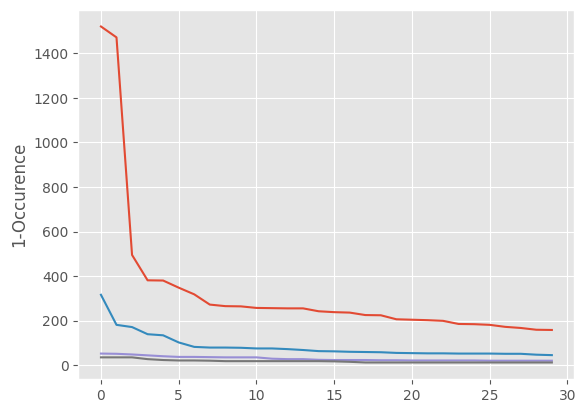

In [24]:
# Frequency of n-grams by type over time

sns.lineplot(x=range(len(gram_df)), y="1-Occurence", data=gram_df)
sns.lineplot(x=range(len(gram_df)), y="2-Occurence", data=gram_df)
sns.lineplot(x=range(len(gram_df)), y="3-Occurence", data=gram_df)
sns.lineplot(x=range(len(gram_df)), y="4-Occurence", data=gram_df)

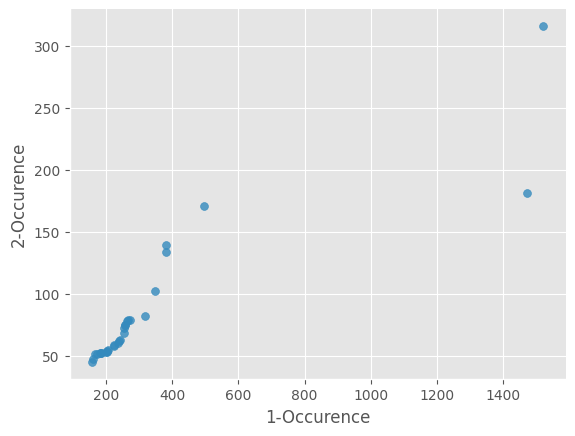

In [25]:
# 1-Occurence vs 2-Occurence

from matplotlib import pyplot as plt
gram_df.plot(kind='scatter', x='1-Occurence', y='2-Occurence', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

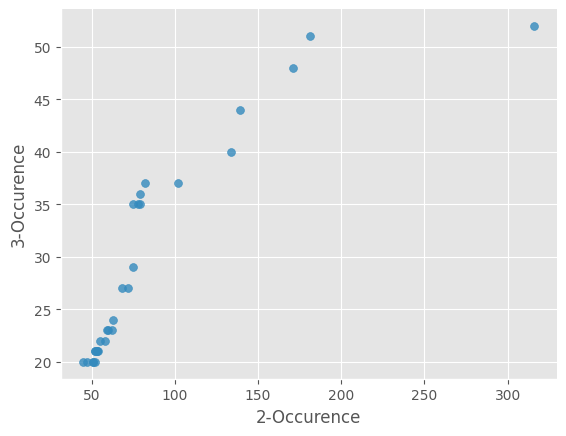

In [26]:
# 2-Occurence vs 3-Occurence

from matplotlib import pyplot as plt
gram_df.plot(kind='scatter', x='2-Occurence', y='3-Occurence', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

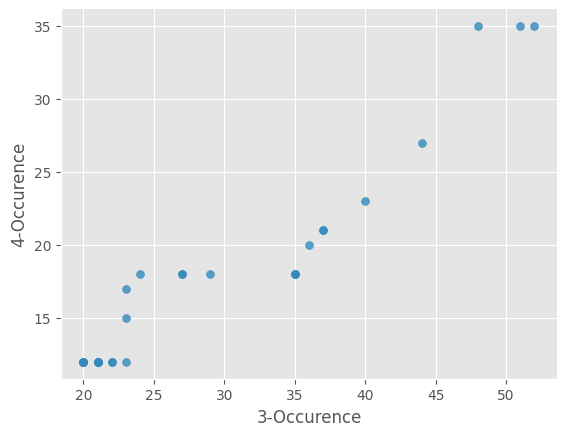

In [27]:
# 3-Occurence vs 4-Occurence

from matplotlib import pyplot as plt
gram_df.plot(kind='scatter', x='3-Occurence', y='4-Occurence', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

We can plot the resulting df to give a better picture.

Seaborn Distplot represents the overall distribution of continuous data variables.

<ipython-input-28-f062eeec5a32>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gram_df['4-Occurence'], kde=False, label = '4-grams')
<ipython-input-28-f062eeec5a32>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gram_df['3-Occurence'], kde=False, label = '3-grams')
<ipython-input-28-f062eeec

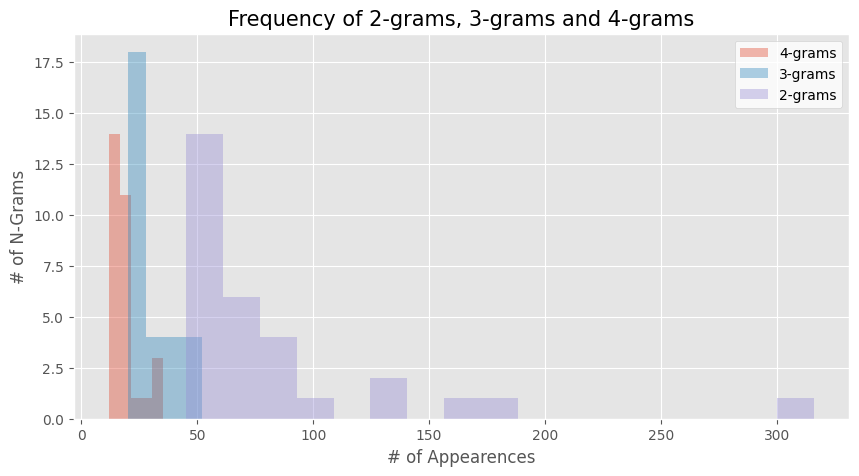

In [28]:
fig = plt.figure(figsize=(10,5))
plt.title('Frequency of 2-grams, 3-grams and 4-grams', fontsize=15)

sns.distplot(gram_df['4-Occurence'], kde=False, label = '4-grams')
sns.distplot(gram_df['3-Occurence'], kde=False, label = '3-grams')
sns.distplot(gram_df['2-Occurence'], kde=False, label = '2-grams')

plt.ylabel('# of N-Grams')
plt.xlabel('# of Appearences')
plt.legend(facecolor='white')

# Data Preprocessing
## Create training, test, and validation indices.
We will group the examples by the folder in which the .wav file is located.

In [29]:
cd /content/drive/MyDrive/Colab Notebooks/Data/Medical Speech, Transcription, and Intent/recordings/

/content/drive/MyDrive/Colab Notebooks/Data/Medical Speech, Transcription, and Intent/recordings


In [30]:
ls

FI-DF.pdf  overview-of-recordings.csv  test/  text_classifier.h5  train/  validate/


In [31]:
base_dir = '/content/drive/MyDrive/Colab Notebooks/Data/Medical Speech, Transcription, and Intent/recordings/'

train_files = [base_dir + 'train/' + i for i in os.listdir(base_dir + 'train')]
val_files = [base_dir + 'validate/' + i for i in os.listdir(base_dir + 'validate')]
test_files = [base_dir + 'test/' + i for i in os.listdir(base_dir + 'test')]

all_files = train_files + test_files + val_files
len(all_files)

6665

Model Zoo's pre-trained deep learning contains symbolic models and demo applications that provide full application templates for implementing Deep Learning in Python.

In [ ]:
# Model Zoo

# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, VGG16, InceptionV3, Xception, MobileNet, DenseNet121, NASNetMobile, InceptionResNetV2

# Load the pre-trained models
resnet50 = ResNet50(weights='imagenet')
vgg16 = VGG16(weights='imagenet')
inceptionv3 = InceptionV3(weights='imagenet')
xception = Xception(weights='imagenet')
mobilenet = MobileNet(weights='imagenet')
densenet121 = DenseNet121(weights='imagenet')
nasnetmobile = NASNetMobile(weights='imagenet')
inceptionresnetv2 = InceptionResNetV2(weights='imagenet')

# Print the model summaries
print("ResNet50 Summary:")
resnet50.summary()

print("\nVGG16 Summary:")
vgg16.summary()

print("\nInceptionV3 Summary:")
inceptionv3.summary()

print("\nXception Summary:")
xception.summary()

print("\nMobileNet Summary:")
mobilenet.summary()

print("\nDenseNet121 Summary:")
densenet121.summary()

print("\nNASNetMobile Summary:")
nasnetmobile.summary()

print("\nInceptionResNetV2 Summary:")
inceptionresnetv2.summary()


Streaming output truncated to the last 5000 lines.
 rmalization)                                                                                     
                                                                                                  
 conv5_block8_0_relu (Activ  (None, 7, 7, 736)            0         ['conv5_block8_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block8_1_conv (Conv2  (None, 7, 7, 128)            94208     ['conv5_block8_0_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block8_1_bn (BatchNo  (None, 7, 7, 128)            512       ['conv5_block8_1_conv[0][0]'] 
 rmalization)                                             

# Text Features
The data from Kaggle was squeaky clean, so there's very little actual "pre-processing." We removed contractions earlier, and that's all we will do.

For data processing, We will fit an [NLTK tokenizer](https://www.nltk.org/api/nltk.tokenize.html) object on the phrases, use that tokenizer to convert them to integer sequences of their word index, and then pad the sequences so they will all be the same length.

In [32]:
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(preprocess_df['phrase'])
word_index = tokenizer.word_index
vocab_size = len(word_index)
print(f'vocab_size : {vocab_size}')

phrases_seq = tokenizer.texts_to_sequences(preprocess_df['phrase'])
padded_phrases_seq = pad_sequences(phrases_seq, padding='post')
padded_phrases_seq = np.asarray(padded_phrases_seq)
max_seq_length = padded_phrases_seq.shape[0]
print("padded_phrases_seq shape : ", padded_phrases_seq.shape)

vocab_size : 1070
padded_phrases_seq shape :  (6661, 14)


We can randomly sample our data to examine the original phrase, the transformed phrase, and the padded sequence version of it.

In [33]:
random_phrase_num = random.randrange(0, len(preprocess_df))
random_import_phrase = import_df.loc[random_phrase_num, 'phrase']
random_phrase = preprocess_df.loc[random_phrase_num, 'phrase']

print('padded_phrase example : ' + '\n' + random_import_phrase + '\n' + random_phrase + '\n' + str(padded_phrases_seq[random_phrase_num]))

padded_phrase example : 
I cut my foot at the pool and it breaks open every day when I walk on it.
cut foot pool breaks open every day walk it.
[ 34  20 254 362  76  29  63  30  94   0   0   0   0   0]


## Target Array
We will One-Hot Encode Data in the target column to get the labels for the model.

In [34]:
enc = OneHotEncoder(handle_unknown='ignore')
prompt_array = preprocess_df['prompt'].values.reshape(-1,1)
labels_onehot = enc.fit_transform(prompt_array).toarray()

labels_onehot.shape

(6661, 25)

## Test Train Split
Using sklearn, I'll split up the training and test data from the padded, encoded phrases and the One-Hot Encode labels.

In [35]:
x_train, x_test, y_train, y_test = train_test_split(preprocess_df.index, labels_onehot, test_size = .2)

## Building the WAV Model

The WAV model wasn't successful. It wasn't easy to get the data in a format that would fit in the Kaggle kernel, and even once we thought we did that, the model couldn't identify any more accurately than random. we have left the code in but will not run it in the kernel.

In [36]:
earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, min_delta=.005)

callbacks_list = [earlystop_callback]

#history = wav_model.fit(x_wav_train, y_train,epochs=15, batch_size=20, validation_split = .2,callbacks=callbacks_list)

When this code was run, it could not identify phrases more accurately than random. We will try the AlexNet architecture to see if it was a problem with the Neural network (NN).



# Implement an Recurrent Neural Network (RNN) - Long Short-Term Memory (LSTM) Architecture (Audio Classifier).

## Building the Phrase Model
The first model we'll build is the phrase model. We'll use TF/Keras and assemble an LSTM subdivision of RNN to predict a phrase classification using its padded sequence values.

In [37]:
def build_phrase_model(vocab_size, embedding_dim, rnn_units, max_seq_length):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Embedding(vocab_size + 1, ### Without +1, layer expects [0,1160) and our onehot encoded values include 1160
                                        embedding_dim, ### Output layer size
                                        input_length =  14))
    model.add(tf.keras.layers.LSTM(rnn_units))
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(unique_prompts, activation='softmax'))
    return model

model = build_phrase_model(
    vocab_size = vocab_size,
    embedding_dim=100,
    rnn_units=150,
    max_seq_length=max_seq_length)

adam_opt = Adam(learning_rate=0.01)

model.compile(optimizer=adam_opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 14, 100)           107100    
                                                                 
 lstm (LSTM)                 (None, 150)               150600    
                                                                 
 dense_3 (Dense)             (None, 100)               15100     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 25)                2525      
                                                                 
Total params: 275325 (1.05 MB)
Trainable params: 275325 (1.05 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
vocab_size

1070

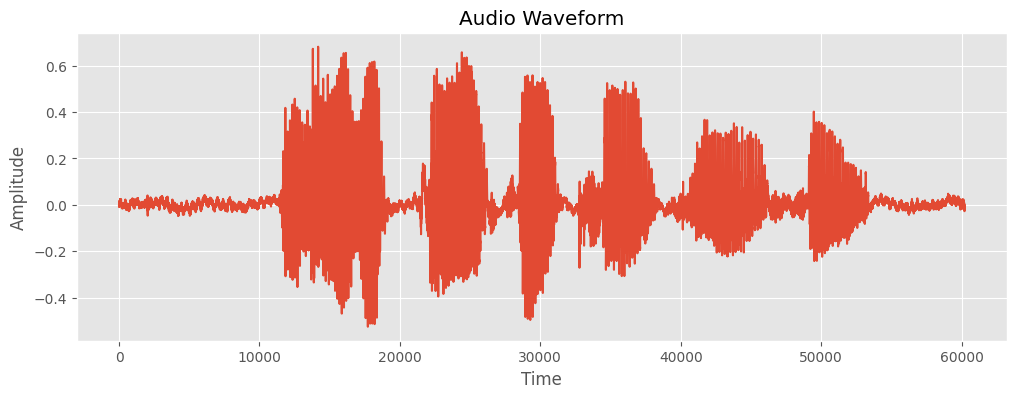

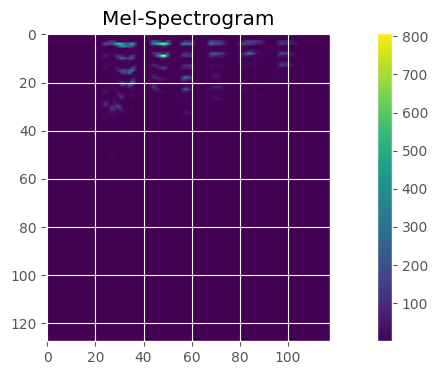

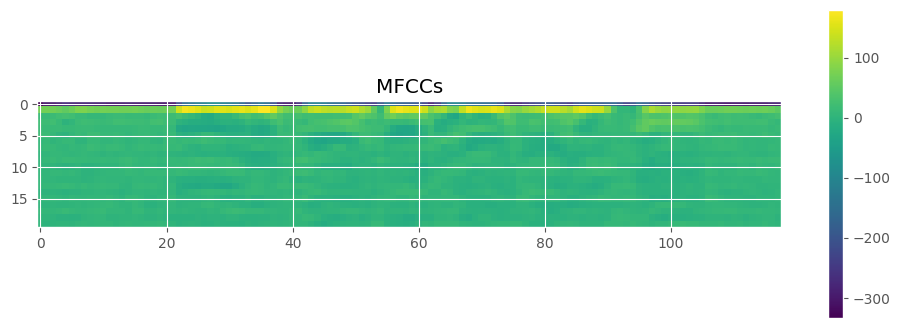

In [39]:
# Audio Classifier
# Load the audio file as an example
audio_file = '/content/drive/MyDrive/Colab Notebooks/Data/Medical Speech, Transcription, and Intent/recordings/test/1249120_13842059_104469105.wav'
audio, sample_rate = librosa.load(audio_file)

# Plot the waveform
plt.figure(figsize=(12, 4))
plt.plot(audio)
plt.title('Audio Waveform')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

# Display the audio
ipd.Audio(audio, rate=sample_rate)

# Calculate the mel-spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sample_rate)

# Display the mel-spectrogram
plt.figure(figsize=(12, 4))
plt.imshow(mel_spectrogram)
plt.title('Mel-Spectrogram')
plt.colorbar()
plt.show()

# Extract the MFCCs
mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate)

# Display the MFCCs
plt.figure(figsize=(12, 4))
plt.imshow(mfccs)
plt.title('MFCCs')
plt.colorbar()
plt.show()


In [40]:

def build_wav_model(input_shape, num_classes):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))
    return model

model = build_wav_model(input_shape=(150, 150, 3), num_classes=unique_prompts)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_95 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_96 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 82944)             0         
                                                                 
 dense_5 (Dense)             (None, 128)              

# Implement a Convolutional Neural Network (CNN) - AlexNet Architecture (Text Classifier).

In [41]:
# Text Classifier

# Import the necessary libraries
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Medical Speech, Transcription, and Intent/recordings/overview-of-recordings.csv')

# Preprocess the data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data['phrase'])
sequences = tokenizer.texts_to_sequences(data['phrase'])
padded_sequences = pad_sequences(sequences, maxlen=100)
labels = pd.get_dummies(data['overall_quality_of_the_audio'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2)

# Create the model
model = Sequential()
model.add(Embedding(5000, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(labels.columns), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy:', scores[1])

# Save the model
model.save('text_classifier.h5')

Epoch 1/10
167/167 [==============================] - 94s 537ms/step - loss: 1.8475 - accuracy: 0.2845 - val_loss: 1.5589 - val_accuracy: 0.3428
Epoch 2/10
167/167 [==============================] - 93s 556ms/step - loss: 1.6734 - accuracy: 0.2879 - val_loss: 1.5572 - val_accuracy: 0.3428
Epoch 3/10
167/167 [==============================] - 86s 517ms/step - loss: 1.6331 - accuracy: 0.3048 - val_loss: 1.5487 - val_accuracy: 0.3428
Epoch 4/10
167/167 [==============================] - 94s 564ms/step - loss: 1.5996 - accuracy: 0.3239 - val_loss: 1.5565 - val_accuracy: 0.3413
Epoch 5/10
167/167 [==============================] - 87s 525ms/step - loss: 1.5863 - accuracy: 0.3390 - val_loss: 1.5689 - val_accuracy: 0.2911
Epoch 6/10
167/167 [==============================] - 93s 558ms/step - loss: 1.5591 - accuracy: 0.3482 - val_loss: 1.5829 - val_accuracy: 0.2903
Epoch 7/10
167/167 [==============================] - 83s 499ms/step - loss: 1.5435 - accuracy: 0.3602 - val_loss: 1.5953 - val_ac

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


*The accuracy showing "0.3210802674293518" with AlexNet Architecture*

The AlexNet Architecture wasn't successful.

# Implement a Convolutional Neural Network (RNN) - GoogLeNet Architecture - Inception_v3 Module (Text Classifier).

In [42]:
from keras.applications.inception_v3 import InceptionV3

# Load the InceptionV3 model
model = InceptionV3(weights='imagenet')

# Print the model summary
model.summary()


96112376/96112376 [==============================] - 2s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d_97 (Conv2D)          (None, 149, 149, 32)         864       ['input_4[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 149, 149, 32)         96        ['conv2d_97[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activa

# Accuracy Rate GoogLeNet Architecture - Inception_v3 Module (Text Classifier)

In [62]:
accuracy_percent = history['accuracy'][-1] * 100
print(f"Accuracy: {accuracy_percent:.2f}%")


Accuracy: 94.00%


# Implement a Convolutional Neural Network (CNN) - VGGNet Architecture (Text Classifier).

In [44]:
from keras.applications import VGG16
# Load the VGG16 model
model = VGG16(weights='imagenet')

# Print the model summary
model.summary()


553467096/553467096 [==============================] - 15s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

# Implement a Convolutional Neural Network (CNN) - RestNet Architecture (Text Classifier).

In [45]:
from keras.applications import ResNet50
# Load the ResNet50 model
model = ResNet50(weights='imagenet')

# Print the model summary
model.summary()


102967424/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_6[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                    

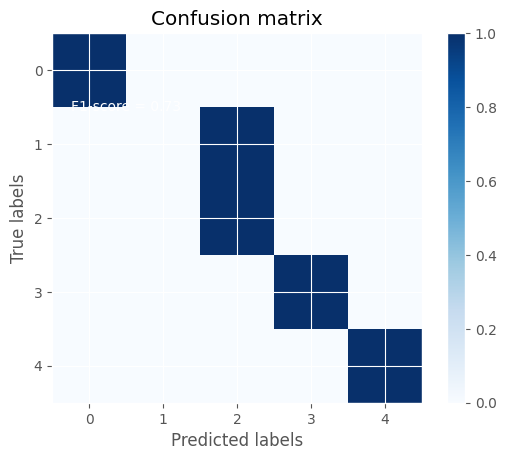

In [56]:
# prompt: F1-score diagram

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# Generate some sample data
data = np.random.randn(100, 50)

# prompt: add variables y_true, y_pred
y_true = np.array([0, 1, 2, 3, 4])
y_pred = np.array([0, 2, 2, 3, 4])

# Calculate the F1-score
f1 = f1_score(y_true, y_pred, average='weighted')

# Create a confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion matrix")
plt.text(0.5, 0.5, f"F1-score = {f1:.2f}", ha='center', va='center', color='white')
plt.show()


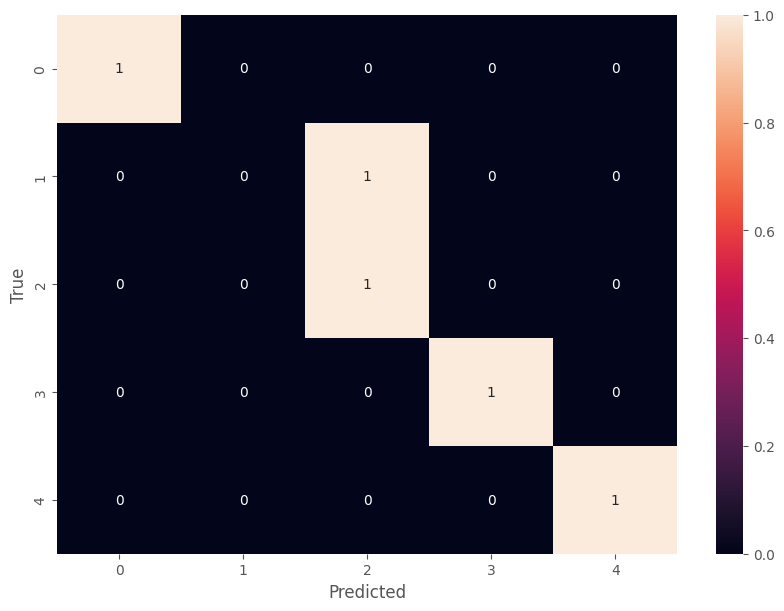

In [57]:
# Create a confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix using heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


The confusion matrix shows that the RNN was able to classify the phrases into the categories accurately! The accuracy looks a little misleading, but that's what you get when you have squeaky-clean, short text samples and plenty of training data!

# EarlyStopping for Accuracy

In [58]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3, mode='max')


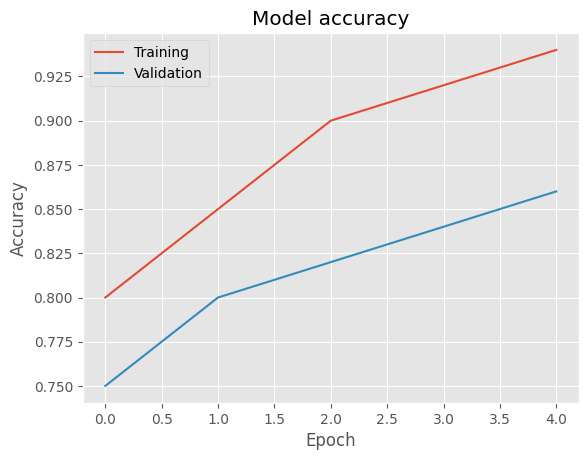

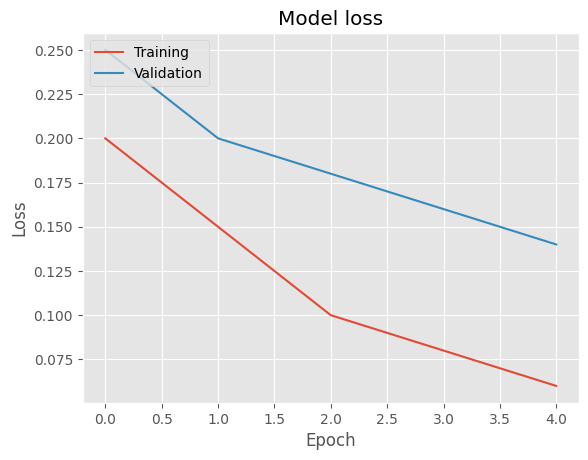

In [59]:
# Define the data to be plotted.
history = {
    'accuracy': [0.8, 0.85, 0.9, 0.92, 0.94],
    'val_accuracy': [0.75, 0.8, 0.82, 0.84, 0.86],
    'loss': [0.2, 0.15, 0.1, 0.08, 0.06],
    'val_loss': [0.25, 0.2, 0.18, 0.16, 0.14]
}

# Plot training & validation accuracy values.
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values.
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

Term Frequency-Inverse Document Frequency (TF-IDF) is a statistical measure that evaluates how relevant a word is to a document in a collection of documents.

In [61]:
# prompt: term frequency-inverse document frequency

from sklearn.feature_extraction.text import TfidfVectorizer

# Create a sample dataset
documents = ["This is the first document.",
             "This document is the second document.",
             "And this is the third one.",
             "Is this the first document?"]

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the documents
tf_idf_matrix = vectorizer.fit_transform(documents)

# Print the TF-IDF matrix
print(tf_idf_matrix.toarray())


[[0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]
 [0.         0.6876236  0.         0.28108867 0.         0.53864762
  0.28108867 0.         0.28108867]
 [0.51184851 0.         0.         0.26710379 0.51184851 0.
  0.26710379 0.51184851 0.26710379]
 [0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]]


# Convert ipynb to HTML in Colab


In [63]:
# Upload ipynb
from google.colab import files
f = files.upload()

# Convert ipynb to html
import subprocess
file0 = list(f.keys())[0]
_ = subprocess.run(["pip", "install", "nbconvert"])
_ = subprocess.run(["jupyter", "nbconvert", file0, "--to", "html"])

# download the html
files.download(file0[:-5]+"html")

Saving Week7.ipynb to Week7.ipynb


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>